In [1]:
import os
import re
from collections import Counter

import numpy as np
import pandas as pd
import imageio

from PIL import Image
from matplotlib import pyplot as plt

import torch
import torchvision.transforms as transforms

/home/nordin/anaconda3/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'libc10_cuda.so: cannot open shared object file: No such file or directory'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
img_arr = imageio.imread('../../data/dlwp/p1ch4/image-dog/bobby.jpg')
img_arr.shape

/tmp/ipykernel_15147/833664412.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread('../../data/dlwp/p1ch4/image-dog/bobby.jpg')


(720, 1280, 3)

This code imports the `imageio` library and uses the `imread()` function to read an image file `bobby.jpg` located in the `./data/p1ch4/image-dog/` directory. The resulting image is stored as a NumPy array in the variable `img_arr`.

The `shape` attribute of the NumPy array is then printed to the console using `img_arr.shape`. This returns a tuple containing the dimensions of the image, in the order `(height, width, channels)`. For example, if the image is 640 pixels wide, 480 pixels tall, and has 3 color channels (red, green, and blue), then the shape would be `(480, 640, 3)`.

In [3]:
img = torch.from_numpy(img_arr)
out = img.permute(2, 0, 1)

This code creates a PyTorch tensor `img` from a NumPy array `img_arr` using the `torch.from_numpy()` function. The tensor `img` has the same data as the NumPy array `img_arr`.

The second line of code `out = img.permute(2, 0, 1)` creates a new tensor `out` that is a permuted version of `img`. The `permute()` method is used to change the order of the dimensions of the tensor. In this case, the dimensions are reordered from `(height, width, channels)` to `(channels, height, width)`. This is done by specifying the order of the dimensions as `(2, 0, 1)`.

The resulting tensor `out` has the same data as `img`, but with the dimensions permuted. This can be useful when working with convolutional neural networks, which often expect input tensors to have a specific order of dimensions.

In [4]:
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)

This code creates a PyTorch tensor `batch` with shape `(3, 3, 256, 256)` and data type `torch.uint8`. The tensor is initialized with zeros using the `torch.zeros()` function.

The first dimension of the tensor represents the batch size, which is set to 3 using the variable `batch_size`. The second dimension represents the number of color channels in the image, which is 3 for RGB images. The third and fourth dimensions represent the height and width of the image, which are both set to 256 pixels.

This tensor can be used to store a batch of 3 RGB images, each with a resolution of 256x256 pixels. The data type `torch.uint8` is used to represent the pixel values as unsigned 8-bit integers, which is the standard format for image data.

In [5]:
data_dir = '../../data/dlwp/p1ch4/image-cats/'
filenames = [name for name in os.listdir(data_dir)
if os.path.splitext(name)[-1] == '.png']
for i, filename in enumerate(filenames):
    img_arr = imageio.imread(os.path.join(data_dir, filename))
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2, 0, 1)
    img_t = img_t[:3]
    batch[i] = img_t

/tmp/ipykernel_15147/1173859239.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread(os.path.join(data_dir, filename))


This code reads a batch of images from a directory using the `imageio` library and stores them in a PyTorch tensor `batch`.

The first line of code sets the variable `data_dir` to the path of the directory containing the images.

The second line of code uses a list comprehension to create a list of filenames in the directory that have the extension `.png`.

The `for` loop iterates over the list of filenames and performs the following operations for each image:

- Reads the image file using `imageio.imread()` and stores the result in a NumPy array `img_arr`.
- Creates a PyTorch tensor `img_t` from the NumPy array using `torch.from_numpy()`.
- Permutes the dimensions of the tensor using `img_t.permute(2, 0, 1)`. This changes the order of the dimensions from `(height, width, channels)` to `(channels, height, width)`.
- Selects the first 3 channels of the tensor using `img_t[:3]`. This is done because some of the images may have more than 3 channels, but we only want to keep the first 3 (which correspond to the red, green, and blue color channels).
- Stores the resulting tensor in the `i`-th row of the `batch` tensor using `batch[i] = img_t`.

At the end of the loop, the `batch` tensor contains a batch of images, where each image has 3 color channels and a resolution of 256x256 pixels. The number of images in the batch is equal to the length of the `filenames` list.

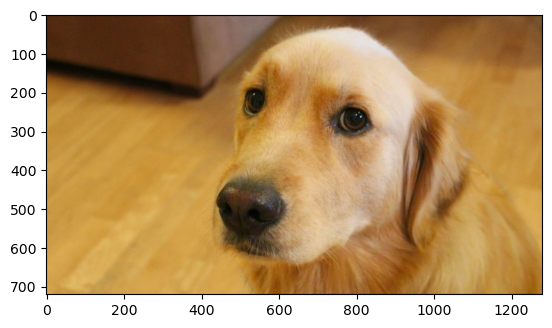

In [6]:
#the dog image
plt.imshow(img);

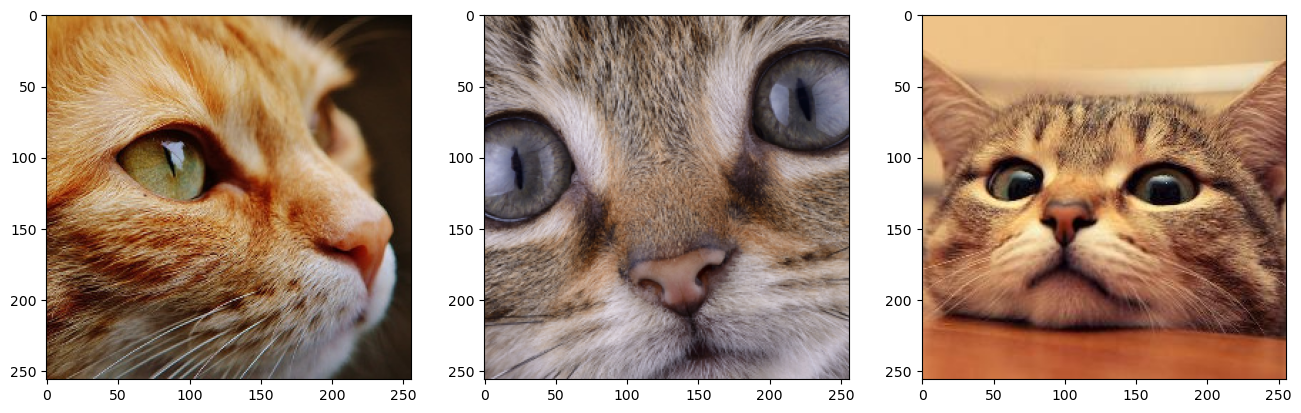

In [7]:
f, ax = plt.subplots(1, batch_size, figsize=(16, 16))
for i in range(batch_size):
    ax[i].imshow(batch[i].numpy().transpose(1, 2, 0))

In [8]:
dir_path = f"../../data/dlwp/p1ch4/volumetric-dicom/2-LUNG 3.0  B70f-04083"
vol_arr = imageio.volread(dir_path, format='DICOM')
vol_arr.shape

Reading DICOM (examining files): 1/99 files (1.0%99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 99/99  (100.0%)


(99, 512, 512)

This code reads a 3D medical image volume from a directory using the `imageio` library and stores it in a NumPy array `vol_arr`.

The first line of code sets the variable `dir_path` to the path of the directory containing the DICOM files.

The second line of code uses the `imageio.volread()` function to read the DICOM files in the directory and store the resulting 3D image volume in the NumPy array `vol_arr`. The second argument to `volread()` specifies the file format, which is `'DICOM'` in this case.

The `shape` attribute of the `vol_arr` array returns a tuple containing the dimensions of the image volume. The dimensions are in the order `(depth, height, width)`, where `depth` is the number of slices in the volume, and `height` and `width` are the dimensions of each slice.

In [9]:
vol = torch.from_numpy(vol_arr).float()
vol = torch.unsqueeze(vol, 0)
vol.shape

torch.Size([1, 99, 512, 512])

This code converts the NumPy array `vol_arr` to a PyTorch tensor `vol`, adds an extra dimension to the tensor, and returns the shape of the resulting tensor.

The first line of code uses the `torch.from_numpy()` function to convert the NumPy array `vol_arr` to a PyTorch tensor `vol`. The `float()` method is used to convert the data type of the tensor to `float32`.

The second line of code uses the `torch.unsqueeze()` function to add an extra dimension to the tensor `vol`. The `0` argument specifies the position of the new dimension, which is added at the beginning of the tensor.

The `shape` attribute of the `vol` tensor returns a tuple containing the dimensions of the tensor. The dimensions are in the order `(channel, depth, height, width)`, where `channel` is the density of cells in the image, and `depth`, `height`, and `width` are the spacial dimensions of each sample.

At this point we could assemble a 5D dataset by stacking multiple volumes along the
batch direction, just as we did in the previous section.

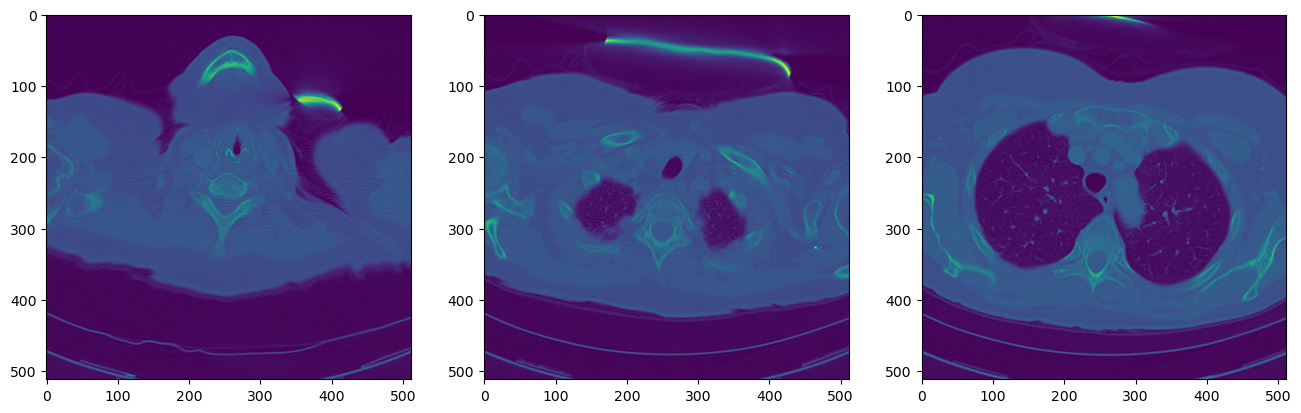

In [10]:
#show the whole volume
f, ax = plt.subplots(1, 3, figsize=(16, 16))
for j, i in enumerate(range(0, 30, 10)):
    ax[j].imshow(vol_arr[i])

In [11]:
df = pd.read_csv('../../data/dlwp/p1ch4/tabular-wine/winequality-white.csv', sep=';', dtype = np.float32)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.700001,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.600000,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.900000,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


This code reads a CSV file containing data on white wine quality into a Pandas DataFrame `df`, and then displays the first five rows of the DataFrame using the `head()` method.

The `pd.read_csv()` function is used to read the CSV file located at the specified path `../../data/dlwp/p1ch4/tabular-wine/winequality-white.csv` into a DataFrame `df`. The `sep` parameter is set to `';'` to specify that the CSV file uses semicolons as separators between values. The `dtype` parameter is set to `np.float32` to specify that the data in the DataFrame should be stored as 32-bit floating point numbers.

The `head()` method of the DataFrame is then used to display the first five rows of the DataFrame. This is a useful way to quickly inspect the data and check that it has been read correctly.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float32
 1   volatile acidity      4898 non-null   float32
 2   citric acid           4898 non-null   float32
 3   residual sugar        4898 non-null   float32
 4   chlorides             4898 non-null   float32
 5   free sulfur dioxide   4898 non-null   float32
 6   total sulfur dioxide  4898 non-null   float32
 7   density               4898 non-null   float32
 8   pH                    4898 non-null   float32
 9   sulphates             4898 non-null   float32
 10  alcohol               4898 non-null   float32
 11  quality               4898 non-null   float32
dtypes: float32(12)
memory usage: 229.7 KB


The `info()` method of a Pandas DataFrame provides a summary of the DataFrame's contents, including the number of rows and columns, the data types of each column, and the number of non-null values in each column.



In [13]:
wine_t = torch.from_numpy(df.values)
wine_t.shape, wine_t.dtype

(torch.Size([4898, 12]), torch.float32)

This code converts the Pandas DataFrame `df` to a PyTorch tensor `wine_t`, and returns the shape and data type of the resulting tensor.

The `values` attribute of the DataFrame is used to extract the underlying NumPy array, which is then passed to the `torch.from_numpy()` function to create a PyTorch tensor `wine_t`.

The `shape` attribute of the `wine_t` tensor returns a tuple containing the dimensions of the tensor. The dimensions are in the order `(num_rows, num_columns)`, where `num_rows` is the number of rows in the DataFrame, and `num_columns` is the number of columns.

The `dtype` attribute of the `wine_t` tensor returns the data type of the tensor, which is `torch.float32` in this case.

In [14]:
data = wine_t[:, :-1]
data, data.shape

(tensor([[ 7.0000,  0.2700,  0.3600,  ...,  3.0000,  0.4500,  8.8000],
         [ 6.3000,  0.3000,  0.3400,  ...,  3.3000,  0.4900,  9.5000],
         [ 8.1000,  0.2800,  0.4000,  ...,  3.2600,  0.4400, 10.1000],
         ...,
         [ 6.5000,  0.2400,  0.1900,  ...,  2.9900,  0.4600,  9.4000],
         [ 5.5000,  0.2900,  0.3000,  ...,  3.3400,  0.3800, 12.8000],
         [ 6.0000,  0.2100,  0.3800,  ...,  3.2600,  0.3200, 11.8000]]),
 torch.Size([4898, 11]))

This code extracts the input features from the PyTorch tensor `wine_t` and returns the resulting tensor `data`, as well as its shape.

The `[:, :-1]` indexing syntax is used to select all rows of the `wine_t` tensor, and all columns except for the last one. This corresponds to selecting all input features and excluding the target variable (quality).

The resulting tensor `data` contains only the input features of the wine quality dataset, and has the same number of rows as the original `wine_t` tensor, but one fewer column. The `shape` attribute of the `data` tensor returns a tuple containing the dimensions of the tensor, which are `(num_rows, num_input_features)`.

In [15]:
target = wine_t[:, -1]
target, target.shape

(tensor([6., 6., 6.,  ..., 6., 7., 6.]), torch.Size([4898]))

This code extracts the target variable from the PyTorch tensor `wine_t` and returns the resulting tensor `target`, as well as its shape.

The `[:, -1]` indexing syntax is used to select all rows of the `wine_t` tensor, and only the last column. This corresponds to selecting only the target variable (quality) and excluding all input features.

The resulting tensor `target` contains only the target variable of the wine quality dataset, and has the same number of rows as the original `wine_t` tensor, but only one column. The `shape` attribute of the `target` tensor returns a tuple containing the dimensions of the tensor, which are `(num_rows,)`.

In [16]:
target = wine_t[:, -1].long()
target

tensor([6, 6, 6,  ..., 6, 7, 6])

This code extracts the target variable from the PyTorch tensor `wine_t` and returns the resulting tensor `target`, as well as its data type.

The `[:, -1]` indexing syntax is used to select all rows of the `wine_t` tensor, and only the last column. This corresponds to selecting only the target variable (quality) and excluding all input features.

The resulting tensor `target` contains only the target variable of the wine quality dataset, and has the same number of rows as the original `wine_t` tensor, but only one column. The `long()` method is used to convert the data type of the tensor to `torch.int64`, which is the data type expected by many PyTorch loss functions.

The `dtype` attribute of the `target` tensor returns the data type of the tensor, which is `torch.int64` in this case.

If targets were string labels, like wine color, assigning an integer number to each string
would let us follow the same approach. 

In [17]:
target_onehot = torch.zeros(target.shape[0], 10)
target_onehot.scatter_(1, target.unsqueeze(1), 1.0)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

This code creates a one-hot encoded representation of the target variable `target` using PyTorch tensors.

The first line creates a tensor `target_onehot` of shape `(num_rows, num_classes)`, where `num_rows` is the number of samples in the dataset (equal to `target.shape[0]`), and `num_classes` is the number of classes in the target variable (in this case, 10).

The second line uses the `scatter_()` method of the `target_onehot` tensor to fill in the one-hot encoding. The `1` argument specifies the dimension along which to scatter the values (in this case, the second dimension, which corresponds to the classes). The call to `unsqueeze` adds a *singleton* dimension, from a 1D tensor of 4,898 elements to a 2D tensor of size (4,898 × 1), without changing its contents — no extra elements are added; we just decided to use an extra index to access the elements. This is necessary because `scatter_()` requires the indices to be of the same shape as the values being scattered. Finally, the value `1.0` is used to fill in the one-hot encoding.

The resulting `target_onehot` tensor is a one-hot encoded representation of the target variable, where each row corresponds to a sample in the dataset, and each column corresponds to a class in the target variable.

PyTorch provides several loss functions that can be used for multi-class classification problems, such as `nn.CrossEntropyLoss()` and `nn.NLLLoss()`, which expect the target variable to be a tensor of class indices. However, if we want to use the score as a categorical input to the network, we need to transform it to a one-hot-encoded tensor, where each row corresponds to a sample in the dataset, and each column corresponds to a class in the target variable. This can be done using the `scatter_()` method of a PyTorch tensor, as shown in the previous code example.

In [18]:
data_mean = torch.mean(data, dim=0)
data_mean

tensor([6.8548e+00, 2.7824e-01, 3.3419e-01, 6.3914e+00, 4.5772e-02, 3.5308e+01,
        1.3836e+02, 9.9403e-01, 3.1883e+00, 4.8985e-01, 1.0514e+01])

This code calculates the mean of each input feature in the PyTorch tensor `data`, and returns the resulting tensor `data_mean`.

The `torch.mean()` function is used to calculate the mean of the tensor `data` along the first dimension (i.e., the rows). The `dim` parameter is set to `0` to specify that the mean should be calculated along the columns (i.e., the input features).



In [19]:
data_var = torch.var(data, dim=0)
data_var

tensor([7.1211e-01, 1.0160e-02, 1.4646e-02, 2.5726e+01, 4.7733e-04, 2.8924e+02,
        1.8061e+03, 8.9455e-06, 2.2801e-02, 1.3025e-02, 1.5144e+00])

This code calculates the variance of each input feature in the PyTorch tensor `data`, and returns the resulting tensor `data_var`.

The `torch.var()` function is used to calculate the variance of the tensor `data` along the first dimension (i.e., the rows). The `dim` parameter is set to `0` to specify that the variance should be calculated along the columns (i.e., the input features).

The resulting tensor `data_var` contains the variance of each input feature in the wine quality dataset, and has the same number of columns as the original `data` tensor, but only one row.

In this case, `dim = 0` indicates that the reduction is performed along dimension 0. At
this point, we can normalize the data by subtracting the mean and dividing by the
standard deviation, which helps with the learning process.

In [20]:
data_normalized = (data - data_mean) / torch.sqrt(data_var)
data_normalized

tensor([[ 1.7208e-01, -8.1761e-02,  2.1326e-01,  ..., -1.2468e+00,
         -3.4915e-01, -1.3930e+00],
        [-6.5743e-01,  2.1587e-01,  4.7997e-02,  ...,  7.3995e-01,
          1.3417e-03, -8.2419e-01],
        [ 1.4756e+00,  1.7450e-02,  5.4378e-01,  ...,  4.7505e-01,
         -4.3677e-01, -3.3663e-01],
        ...,
        [-4.2043e-01, -3.7940e-01, -1.1915e+00,  ..., -1.3130e+00,
         -2.6153e-01, -9.0545e-01],
        [-1.6054e+00,  1.1666e-01, -2.8253e-01,  ...,  1.0049e+00,
         -9.6251e-01,  1.8574e+00],
        [-1.0129e+00, -6.7703e-01,  3.7852e-01,  ...,  4.7505e-01,
         -1.4882e+00,  1.0448e+00]])

This code normalizes the input features in the PyTorch tensor `data` using the mean and variance of each feature, and returns the resulting tensor `data_normalized`.

The input features are normalized using the formula `(x - mean) / sqrt(variance)`, where `x` is the original value of the input feature, `mean` is the mean value of the input feature, and `variance` is the variance of the input feature.

The code subtracts the mean of each input feature from the corresponding values in the `data` tensor, and then divides the result by the square root of the variance of each input feature. This is done using element-wise operations in PyTorch.

The resulting tensor `data_normalized` contains the normalized input features of the wine quality dataset, and has the same shape as the original `data` tensor.

In [21]:
bad_indexes = target <= 3 #PyTorch also provides comparison functions, 
                          # here torch.le(target, 3), but using operators 
                          # seems to be a good standard.

bad_indexes.shape, bad_indexes.dtype, bad_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(20))

This code creates a boolean mask `bad_indexes` that is `True` for samples in the wine quality dataset with a target value less than or equal to 3, and `False` otherwise. It then returns the shape, data type, and sum of the `bad_indexes` tensor.

The comparison operator `<=` is used to compare each element of the `target` tensor with the scalar value `3`, resulting in a boolean tensor of the same shape as `target`.

The `shape` attribute of the `bad_indexes` tensor returns a tuple containing the dimensions of the tensor, which are `(num_rows,)`. The `dtype` attribute returns the data type of the tensor, which is `torch.bool` in this case. The `sum()` method returns the number of `True` values in the tensor, which corresponds to the number of samples in the dataset with a target value less than or equal to 3.

Note that only 20 of the `bad_indexes` entries are set to `True`! By using a feature in
PyTorch called *advanced indexing*, which is PyTorch's version of NumPy's *fancy indexing*, we can use a tensor with data type `torch.bool` to index the data tensor. This will essentially filter data to be only items (or rows) corresponding to `True` in the indexing tensor. The `bad_indexes` tensor has the same shape as target, with values of `False` or `True` depending on the outcome of the comparison between our threshold and each element in the original `target` tensor:

In [22]:
bad_data = data[bad_indexes]
bad_data.shape

torch.Size([20, 11])

In [23]:
bad_data = data[target <= 3]
mid_data = data[(target > 3) & (target < 7)]    #For Boolean NumPy arrays and 
                                                # PyTorch tensors, the & operator 
                                                # does a logical "and" operation.

good_data = data[target >= 7]
bad_mean = torch.mean(bad_data, dim=0)
mid_mean = torch.mean(mid_data, dim=0)
good_mean = torch.mean(good_data, dim=0)
for i, args in enumerate(zip(df.columns, bad_mean, mid_mean, good_mean)):
    print('{:2} {:20} {:6.2f} {:6.2f} {:6.2f}'.format(i, *args))

 0 fixed acidity          7.60   6.89   6.73
 1 volatile acidity       0.33   0.28   0.27
 2 citric acid            0.34   0.34   0.33
 3 residual sugar         6.39   6.71   5.26
 4 chlorides              0.05   0.05   0.04
 5 free sulfur dioxide   53.33  35.42  34.55
 6 total sulfur dioxide 170.60 141.83 125.25
 7 density                0.99   0.99   0.99
 8 pH                     3.19   3.18   3.22
 9 sulphates              0.47   0.49   0.50
10 alcohol               10.34  10.26  11.42


In [24]:
#That is equivalent to the following code using Pandas:
groups = df.groupby(pd.cut(df['quality'], bins=[0, 3, 7, 10], labels=['bad', 'mid', 'good']))
means = groups.mean()
means.T

quality,bad,mid,good
fixed acidity,7.600000,6.858376,6.678333
volatile acidity,0.333250,0.278017,0.277972
citric acid,0.336000,0.334415,0.328167
residual sugar,6.392500,6.420647,5.628333
chlorides,0.054300,0.046033,0.038011
free sulfur dioxide,53.325001,35.180820,36.627777
total sulfur dioxide,170.600006,138.701462,125.883331
density,0.994884,0.994093,0.992214
pH,3.187500,3.187009,3.221167
sulphates,0.474500,0.490072,0.485667


In [25]:
bikes_numpy = np.loadtxt(
"../../data/dlwp/p1ch4/bike-sharing-dataset/hour-fixed.csv",
dtype=np.float32,
delimiter=",",
skiprows=1,
converters={1: lambda x: float(x[8:10])})   #Converts date strings to 
                                            # numbers corresponding to the 
                                            # day of the month in column 1

bikes = torch.from_numpy(bikes_numpy)
bikes

tensor([[1.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 3.0000e+00, 1.3000e+01,
         1.6000e+01],
        [2.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 8.0000e+00, 3.2000e+01,
         4.0000e+01],
        [3.0000e+00, 1.0000e+00, 1.0000e+00,  ..., 5.0000e+00, 2.7000e+01,
         3.2000e+01],
        ...,
        [1.7377e+04, 3.1000e+01, 1.0000e+00,  ..., 7.0000e+00, 8.3000e+01,
         9.0000e+01],
        [1.7378e+04, 3.1000e+01, 1.0000e+00,  ..., 1.3000e+01, 4.8000e+01,
         6.1000e+01],
        [1.7379e+04, 3.1000e+01, 1.0000e+00,  ..., 1.2000e+01, 3.7000e+01,
         4.9000e+01]])

In [26]:
bikes.shape, bikes.stride()

(torch.Size([17520, 17]), (17, 1))

In [27]:
daily_bikes = bikes.view(-1, 24, bikes.shape[1])
daily_bikes.shape, daily_bikes.stride()

(torch.Size([730, 24, 17]), (408, 17, 1))

This code reshapes the PyTorch tensor `bikes` into a new tensor `daily_bikes` that has a shape of `(num_days, 24, num_features)`, where `num_days` is the number of days in the dataset, `24` is the number of hours in a day, and `num_features` is the number of input features in the dataset. It then returns the shape and stride of the `daily_bikes` tensor.

The `view()` method is used to reshape the `bikes` tensor. The first argument `-1` specifies that the size of the first dimension should be inferred from the other dimensions, such that the total number of elements in the tensor remains the same. The second argument `24` specifies the size of the second dimension, which corresponds to the number of hours in a day. The third argument `bikes.shape[1]` specifies the size of the third dimension, which corresponds to the number of input features in the dataset.



In [28]:
daily_bikes = daily_bikes.transpose(1, 2)
daily_bikes.shape, daily_bikes.stride()

(torch.Size([730, 17, 24]), (408, 1, 17))

This code transposes the PyTorch tensor `daily_bikes` such that the second and third dimensions are swapped, and returns the resulting tensor's shape and stride.

The `transpose()` method is used to swap the second and third dimensions of the `daily_bikes` tensor. The first argument `1` specifies the current index of the second dimension, and the second argument `2` specifies the current index of the third dimension. By swapping these indices, the second dimension becomes the number of input features, and the third dimension becomes the number of hours in a day.

The resulting tensor `daily_bikes` has the same data as the original `daily_bikes` tensor, but with a new shape that groups the data by day and input feature. The `shape` attribute of the `daily_bikes` tensor returns a tuple containing the dimensions of the tensor, which are `(num_days, num_features, 24)`. The `stride()` method returns a tuple containing the number of steps in each dimension when iterating over the tensor.

In [29]:
first_day = bikes[:24].long()
weather_onehot = torch.zeros(first_day.shape[0], 4)
first_day[:,9]

tensor([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2])

This code excerpt loads the first 24 rows of the `bikes` dataset into a PyTorch tensor `first_day`, converts the tensor to a `long` data type, creates a tensor `weather_onehot` of shape `(24, 4)` filled with zeros, and selects the 10th column of the `first_day` tensor.

The expression `bikes[:24]` selects the first 24 rows of the `bikes` dataset, and the `.long()` method is used to convert the resulting tensor to a `long` data type.

The expression `torch.zeros(first_day.shape[0], 4)` creates a new tensor `weather_onehot` of shape `(24, 4)` filled with zeros. This tensor is intended to be used for one-hot encoding of the weather feature in the `bikes` dataset.

The expression `first_day[:,9]` selects the 10th column of the `first_day` tensor, which corresponds to the `weather` feature in the `bikes` dataset. This expression returns a one-dimensional tensor of shape `(24,)` that contains the weather values for the first 24 hours of the dataset.

In [30]:
weather_onehot.scatter_(
dim=1,
index=first_day[:,9].unsqueeze(1).long() - 1, #Decreases the values by 1
                                              # because weather situation 
                                              # ranges from 1 to 4, while 
                                              # indices are 0-based
value=1.0)

tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]])

This code uses the `scatter_()` method of a PyTorch tensor `weather_onehot` to perform one-hot encoding of the weather feature in the `bikes` dataset for the first 24 hours of the dataset.

The `scatter_()` method is used to scatter the value `1.0` along the second dimension of the `weather_onehot` tensor, according to the indices specified by the `index` tensor. The `dim` argument specifies the dimension along which to scatter the values, and the `value` argument specifies the value to scatter.

The `index` tensor is created by selecting the 10th column of the `first_day` tensor, which corresponds to the `weather` feature in the `bikes` dataset. The `.unsqueeze(1)` method is used to add a new dimension to the `index` tensor, which has the effect of converting it from a one-dimensional tensor of shape `(24,)` to a two-dimensional tensor of shape `(24, 1)`. The `.long()` method is used to convert the `index` tensor to a `long` data type. Finally, the `- 1` operation is used to decrease the values in the `index` tensor by 1, because the weather situation ranges from 1 to 4, while indices are 0-based.

The resulting `weather_onehot` tensor has a shape of `(24, 4)` and contains one-hot encoded values for the weather feature in the `bikes` dataset for the first 24 hours of the dataset.

In [31]:
torch.cat((bikes[:24], weather_onehot), 1)[:1]

tensor([[ 1.0000,  1.0000,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  6.0000,
          0.0000,  1.0000,  0.2400,  0.2879,  0.8100,  0.0000,  3.0000, 13.0000,
         16.0000,  1.0000,  0.0000,  0.0000,  0.0000]])

This code concatenates the first 24 rows of the `bikes` dataset with a one-hot encoded representation of the weather feature for the first 24 hours of the dataset, and selects the first row of the resulting tensor.

The `torch.cat()` function is used to concatenate the `bikes[:24]` tensor and the `weather_onehot` tensor along the second dimension (i.e., column-wise). The resulting tensor has a shape of `(24, num_features + 4)`, where `num_features` is the number of input features in the `bikes` dataset. The `[:1]` indexing expression is then used to select the first row of this tensor.

The resulting tensor contains the input features and weather information for the first hour of the `bikes` dataset, concatenated along the second dimension. The first `num_features` columns correspond to the input features, and the last 4 columns correspond to the one-hot encoded weather feature.

In [32]:
daily_weather_onehot = torch.zeros(daily_bikes.shape[0], 4,
daily_bikes.shape[2])
daily_weather_onehot.shape

torch.Size([730, 4, 24])

This code creates a PyTorch tensor `daily_weather_onehot` of shape `(num_days, 4, 24)` filled with zeros, where `num_days` is the number of days in the `daily_bikes` dataset.

The first argument `daily_bikes.shape[0]` specifies the size of the first dimension of the `daily_weather_onehot` tensor, which corresponds to the number of days in the `daily_bikes` dataset. The second argument `4` specifies the size of the second dimension, which corresponds to the number of weather categories in the `bikes` dataset. The third argument `daily_bikes.shape[2]` specifies the size of the third dimension, which corresponds to the number of hours in a day.

The resulting tensor `daily_weather_onehot` contains all zeros and has a shape of `(num_days, 4, 24)`. This tensor is likely intended to be used for one-hot encoding of the weather feature in the `daily_bikes` dataset.

In [33]:
daily_weather_onehot.scatter_(
1, daily_bikes[:,9,:].long().unsqueeze(1) - 1, 1.0)
daily_weather_onehot.shape

torch.Size([730, 4, 24])

This code performs one-hot encoding of the weather feature in the `daily_bikes` dataset using the `scatter_()` method of a PyTorch tensor `daily_weather_onehot`. It then returns the shape of the `daily_weather_onehot` tensor.

The `scatter_()` method is used to scatter the value `1.0` along the second dimension of the `daily_weather_onehot` tensor, according to the indices specified by the `daily_bikes[:,9,:]` tensor. The `1` argument specifies the dimension along which to scatter the values, and the `1.0` argument specifies the value to scatter.

The `daily_bikes[:,9,:]` tensor selects the 10th column of the `daily_bikes` tensor, which corresponds to the weather feature in the `bikes` dataset. The `.long()` method is used to convert the resulting tensor to a `long` data type. The `.unsqueeze(1)` method is used to add a new dimension to the tensor, which has the effect of converting it from a two-dimensional tensor of shape `(num_days, 24)` to a three-dimensional tensor of shape `(num_days, 1, 24)`. Finally, the `- 1` operation is used to decrease the values in the tensor by 1, because the weather situation ranges from 1 to 4, while indices are 0-based.

The resulting `daily_weather_onehot` tensor has a shape of `(num_days, 4, 24)` and contains one-hot encoded values for the weather feature in the `daily_bikes` dataset.

In [34]:
daily_bikes = torch.cat((daily_bikes, daily_weather_onehot), dim=1)

This code concatenates the `daily_bikes` tensor with a one-hot encoded representation of the weather feature in the `daily_bikes` dataset, along the second dimension (i.e., column-wise).

The `torch.cat()` function is used to concatenate the `daily_bikes` tensor and the `daily_weather_onehot` tensor along the second dimension. The resulting tensor has a shape of `(num_days, num_features + 4, 24)`, where `num_days` is the number of days in the `daily_bikes` dataset, `num_features` is the number of input features in the `bikes` dataset, and `24` is the number of hours in a day.

The resulting tensor `daily_bikes` contains the input features and weather information for each hour of each day in the `daily_bikes` dataset, concatenated along the second dimension. The first `num_features` columns correspond to the input features, and the last 4 columns correspond to the one-hot encoded weather feature.

In [35]:
#Min Max Scaling
temp = daily_bikes[:, 10, :]
temp_min = torch.min(temp)
temp_max = torch.max(temp)
daily_bikes[:, 10, :] = ((daily_bikes[:, 10, :] - temp_min)
/ (temp_max - temp_min))

This code excerpt normalizes the temperature feature in the `daily_bikes` dataset to have values between 0 and 1.

The first line of code selects the temperature feature for all days and all hours in the `daily_bikes` dataset, and assigns it to the variable `temp`.

The second line of code calculates the minimum value of the `temp` tensor using the `torch.min()` function, and assigns it to the variable `temp_min`.

The third line of code calculates the maximum value of the `temp` tensor using the `torch.max()` function, and assigns it to the variable `temp_max`.

The fourth line of code normalizes the temperature feature in the `daily_bikes` dataset by subtracting the minimum value of the `temp` tensor from each element of the temperature feature, and then dividing by the range of the `temp` tensor (i.e., the difference between the maximum and minimum values). The resulting normalized temperature feature is then assigned back to the `daily_bikes` tensor.

After this code is executed, the temperature feature in the `daily_bikes` dataset will have values between 0 and 1, with 0 corresponding to the minimum temperature in the dataset, and 1 corresponding to the maximum temperature in the dataset.

In [36]:
#Standardization
temp = daily_bikes[:, 10, :]
daily_bikes[:, 10, :] = ((daily_bikes[:, 10, :] - torch.mean(temp))
/ torch.std(temp))

This code excerpt standardizes the temperature feature in the `daily_bikes` dataset to have a mean of 0 and a standard deviation of 1.

The first line of code selects the temperature feature for all days and all hours in the `daily_bikes` dataset, and assigns it to the variable `temp`.

The second line of code calculates the mean value of the `temp` tensor using the `torch.mean()` function.

The third line of code calculates the standard deviation of the `temp` tensor using the `torch.std()` function.

The fourth line of code standardizes the temperature feature in the `daily_bikes` dataset by subtracting the mean value of the `temp` tensor from each element of the temperature feature, and then dividing by the standard deviation of the `temp` tensor. The resulting standardized temperature feature is then assigned back to the `daily_bikes` tensor.

After this code is executed, the temperature feature in the `daily_bikes` dataset will have a mean of 0 and a standard deviation of 1.

In the latter case, our variable will have 0 mean and unitary standard deviation. If our
variable were drawn from a Gaussian distribution, 68% of the samples would sit in the
[-1.0, 1.0] interval *(i.e. $[-\sigma , \sigma]$)* .

In [37]:
with open('../../data/dlwp/p1ch4/jane-austen/1342-0.txt', encoding='utf8') as f:
    text = f.read()

In [38]:
text.__sizeof__()/(1024**2) #in MB

1.3432064056396484

In [39]:
lines = text.split('\n')
line = lines[200]
line

'“Impossible, Mr. Bennet, impossible, when I am not acquainted with him'

This code excerpt splits a string `text` into a list of strings `lines` using the newline character `\n` as a delimiter, and then selects the 201st line of the `lines` list and assigns it to the variable `line`.

The `text` string likely contains a large amount of text, such as a book or a document. The `split()` method is used to split the text into individual lines, which are then stored in the `lines` list. The `lines[200]` indexing expression is used to select the 201st line of the `lines` list (Python uses 0-based indexing), which is then assigned to the variable `line`.

After this code is executed, the `line` variable will contain the 201st line of the `text` string.

In [40]:
letter_t = torch.zeros(len(line), 128) #128 is the number of ASCII characters
letter_t.shape

torch.Size([70, 128])

This code creates a PyTorch tensor `letter_t` filled with zeros, with a shape of `(num_letters, 128)`.

The first argument `len(line)` specifies the size of the first dimension of the `letter_t` tensor, which corresponds to the number of letters in the `line` string. The second argument `128` specifies the size of the second dimension, which corresponds to the number of possible ASCII characters.

The resulting tensor `letter_t` contains all zeros and has a shape of `(num_letters, 128)`. This tensor is likely intended to be used for one-hot encoding of the letters in the `line` string, where each row corresponds to a letter and each column corresponds to an ASCII character.

In [41]:
for i, letter in enumerate(line.lower().strip()):
    letter_index = ord(letter) if ord(letter) < 128 else 0 #The text uses directional double
                                                           # quotes, which are not valid ASCII,
                                                           # so we screen them out here.

    letter_t[i][letter_index] = 1

This code encodes the letters in the `line` string using one-hot encoding and stores the resulting tensor in `letter_t`.

The `enumerate()` function is used to iterate over each letter in the `line` string, along with its index. The `lower()` method is used to convert each letter to lowercase, and the `strip()` method is used to remove any leading or trailing whitespace.

For each letter, the `ord()` function is used to get its ASCII code, which is then used as an index into the `letter_t` tensor. If the ASCII code is greater than or equal to 128, it is set to 0 instead.

The resulting tensor `letter_t` has a shape of `(num_letters, 128)` and contains one-hot encoded values for each letter in the `line` string, where each row corresponds to a letter and each column corresponds to an ASCII character. The value 1 in a given row and column indicates that the corresponding letter has the corresponding ASCII code.

In [42]:
def clean_words(input_str):
    punctuation = '.,;:"!?”“_-'
    word_list = input_str.lower().replace('\n',' ').split()
    word_list = [word.strip(punctuation) for word in word_list]
    return word_list

words_in_line = clean_words(line)
line, words_in_line

('“Impossible, Mr. Bennet, impossible, when I am not acquainted with him',
 ['impossible',
  'mr',
  'bennet',
  'impossible',
  'when',
  'i',
  'am',
  'not',
  'acquainted',
  'with',
  'him'])

This code defines a function `clean_words` that takes a string `input_str` as input, and returns a list of cleaned words.

The first line of the function defines a string `punctuation` that contains a set of punctuation characters to be removed from the input string.

The second line of the function converts the input string to lowercase, replaces newline characters with spaces, and splits the resulting string into a list of words.

The third line of the function uses a list comprehension to remove the punctuation characters from each word in the list of words.

The fourth line of the function returns the resulting list of cleaned words.

The fifth line of the code calls the `clean_words` function on the `line` string, and assigns the resulting list of cleaned words to the variable `words_in_line`.

The sixth line of the code prints the original `line` string and the list of cleaned words `words_in_line`.

In [43]:
word_list = sorted(set(clean_words(text)))
word2index_dict = {word: i for (i, word) in enumerate(word_list)}
len(word2index_dict), word2index_dict['impossible']

(7261, 3394)

This code creates a dictionary `word2index_dict` that maps each word in the cleaned `text` string to a unique integer index.

The first line of the code uses the `clean_words()` function to clean the `text` string, and then creates a sorted set of unique words in the cleaned text using the `set()` and `sorted()` functions. The resulting list of unique words is assigned to the variable `word_list`.

The second line of the code creates a dictionary `word2index_dict` using a dictionary comprehension. The keys of the dictionary are the words in `word_list`, and the values are the corresponding integer indices, which are generated using the `enumerate()` function.

The third line of the code prints the length of the `word2index_dict` dictionary (i.e., the number of unique words in the cleaned text) and the index of the word "impossible" in the dictionary.

After this code is executed, the `word2index_dict` dictionary can be used to map each word in the cleaned text to a unique integer index, which can be used for various natural language processing tasks such as text classification or language modeling.

In [44]:
word_t = torch.zeros(len(words_in_line), len(word2index_dict))
for i, word in enumerate(words_in_line):
    word_index = word2index_dict[word]
    word_t[i][word_index] = 1
    print('{:2} {:4} {}'.format(i, word_index, word))
print(word_t.shape)

 0 3394 impossible
 1 4305 mr
 2  813 bennet
 3 3394 impossible
 4 7078 when
 5 3315 i
 6  415 am
 7 4436 not
 8  239 acquainted
 9 7148 with
10 3215 him
torch.Size([11, 7261])


This code encodes the words in the `words_in_line` list using one-hot encoding and stores the resulting tensor in `word_t`.

The first line of the code creates a PyTorch tensor `word_t` filled with zeros, with a shape of `(num_words, num_unique_words)`.

The second line of the code uses a `for` loop to iterate over each word in the `words_in_line` list, along with its index. For each word, the corresponding integer index is retrieved from the `word2index_dict` dictionary.

The third line of the code uses the retrieved index to set the corresponding element of the `word_t` tensor to 1, indicating that the corresponding word is present in the input text.

The fourth line of the code prints the index of each word in the `words_in_line` list, along with the corresponding word.

The fifth line of the code prints the shape of the resulting `word_t` tensor.

After this code is executed, the `word_t` tensor will contain one-hot encoded values for each word in the `words_in_line` list, where each row corresponds to a word and each column corresponds to a unique word in the cleaned text. The value 1 in a given row and column indicates that the corresponding word is present in the input text.

## Text embeddings as a blueprint
Text embeddings are numeric vectors that represent a large vocabulary, and they're useful when one-hot encoding becomes burdensome. The process of improving embeddings is a common technique and can be applied to categorical data beyond text. Even in text applications, pre-learned embeddings can be improved during problem-solving. Word embeddings can also serve as a blueprint for co-occurrences of observations, such as in recommender systems. Processing text is a well-explored task that deals with sequences, and techniques used in natural language processing can inspire approaches to other tasks involving time series.

## 4.7 Exercises
1. Take several pictures of red, blue, and green items with your phone or other digital camera (or download some from the internet, if a camera isn’t available).
    * $a$ - Load each image, and convert it to a tensor.
    * $b$ - For each image tensor, use the .mean() method to get a sense of how bright the image is.
    * $c$ - Take the mean of each channel of your images. Can you identify the red, green, and blue items from only the channel averages? *This goes by the name fine-tuning.*

 

2. Select a relatively large file containing Python source code.
    * $a$ - Build an index of all the words in the source file (feel free to make your tokenization as simple or as complex as you like; we suggest starting with replacing r"[^a-zA-Z0-9_]+" with spaces).
    * $b$ - Compare your index with the one we made for Pride and Prejudice. Which is larger?
    * $c$ - Create the one-hot encoding for the source code file.
    * $d$ - What information is lost with this encoding? How does that information compare to what’s lost in the Pride and Prejudice encoding?

a. To load each image and convert it to a tensor, you can use the `PIL` (Python Imaging Library) and `torchvision` libraries. Here's an example code snippet:



In [ ]:
# Load image and convert to tensor
img = Image.open('red_item.jpg')
transform = transforms.ToTensor()
img_tensor = transform(img)



You can repeat this code for each image, replacing the filename with the appropriate image file.

b. To get a sense of how bright each image is, you can use the `.mean()` method on the image tensor. Here's an example code snippet:



In [ ]:
# Get mean brightness of image
brightness = img_tensor.mean()
print('Brightness:', brightness)



You can repeat this code for each image tensor.

c. To take the mean of each channel of the images, you can use the `.mean()` method on the appropriate dimension of the image tensor. Here's an example code snippet:



In [ ]:
# Take mean of each channel
channel_means = img_tensor.mean(dim=(1,2))
print('Channel means:', channel_means)



You can repeat this code for each image tensor.

d. To build an index of all the words in a Python source code file, you can use the `re` (regular expression) and `collections` libraries. Here's an example code snippet:



In [ ]:
# Load source code file
with open('source_code.py', 'r') as f:
    source_code = f.read()

# Tokenize source code
tokens = re.findall(r'\w+', source_code)

# Build word index
word_counts = Counter(tokens)
word_list = sorted(word_counts.keys())
word2index_dict = {word: i for (i, word) in enumerate(word_list)}



To compare the index with the one made for Pride and Prejudice, you can load the Pride and Prejudice index and compare the number of unique words. Here's an example code snippet:



In [48]:
# Load Pride and Prejudice index
with open('../../data/dlwp/p1ch4/jane-austen/1342-0.txt', 'r') as f:
    pp_index = f.read().splitlines()

# Compare number of unique words
print('Number of unique words in source code:', len(word_list))
print('Number of unique words in Pride and Prejudice:', len(pp_index))

Number of unique words in source code: 7261
Number of unique words in Pride and Prejudice: 13427




To create the one-hot encoding for the source code file, you can use the `torch` library. Here's an example code snippet:



In [ ]:
# Create one-hot encoding
word_t = torch.zeros(len(tokens), len(word2index_dict))
for i, word in enumerate(tokens):
    word_index = word2index_dict[word]
    word_t[i][word_index] = 1



To determine what information is lost with this encoding and how it compares to the Pride and Prejudice encoding, you can consider the fact that one-hot encoding only captures the presence or absence of each word in the text, and not the order or context of the words. This is similar to the encoding used for Pride and Prejudice, which also only captures the presence or absence of each word in the text. However, the one-hot encoding for the source code file may lose additional information such as variable names, function names, and comments, which are not present in the Pride and Prejudice encoding.

## 4.8 Summary
1. Neural networks require data to be represented as multidimensional numerical
tensors, often 32-bit floating-point.
2. In general, PyTorch expects data to be laid out along specific dimensions
according to the model architecture—for example, convolutional versus recurrent. We can reshape data effectively with the PyTorch tensor API.
3. Thanks to how the PyTorch libraries interact with the Python standard library
and surrounding ecosystem, loading the most common types of data and converting them to PyTorch tensors is convenient.
4. Images can have one or many channels. The most common are the red-greenblue channels of typical digital photos.
5. Many images have a per-channel bit depth of 8, though 12 and 16 bits per channel are not uncommon. These bit depths can all be stored in a 32-bit floatingpoint number without loss of precision.
6. Single-channel data formats sometimes omit an explicit channel dimension.
7. Volumetric data is similar to 2D image data, with the exception of adding a
third dimension (depth).
8. Converting spreadsheets to tensors can be very straightforward. Categorical and ordinal-valued columns should be handled differently from interval-valued
columns.
9. Text or categorical data can be encoded to a one-hot representation through the
use of dictionaries. Very often, embeddings give good, efficient representations.
